# Projeto 3 Ciência dos dados - análise de funding de startups #


In [48]:

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#abrindo e limpando o banco de dados
full_data = pd.read_csv("kickstarter-projects/ks-projects-201801.csv")
interest_categories = [ 'main_category' , 'goal' , 'pledged' , 'backers' , 'country' , 'usd pledged' , 'state' ]
data = full_data[interest_categories]
data.head()

,main_category,goal,pledged,backers,country,usd pledged,state
0,Publishing,1000.0,0.0,0,GB,0.0,failed
1,Film & Video,30000.0,2421.0,15,US,100.0,failed
2,Film & Video,45000.0,220.0,3,US,220.0,failed
3,Music,5000.0,1.0,1,US,1.0,failed
4,Film & Video,19500.0,1283.0,14,US,1283.0,canceled


## Análise exploratória dos dados:

In [52]:
#Análise entre categorias dos projetos e êxito:
data.loc[(data.state=='canceled') | (data.state=='failed') | (data.state=='suspended'),'Result'] = 'failed'
data.loc[(data.state=='succesful') | (data.state=='live'),'Result'] = 'succeded'
ct1=pd.crosstab(data['main_category'], data.Result, normalize='columns', margins=True)*100
ct1

C:\Users\W10\Anaconda3.7\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


Result,failed,succeded,All
main_category,,,
Art,6.901369,6.931047,6.901714
Comics,2.056272,2.715255,2.063921
Crafts,2.776659,2.715255,2.775946
Dance,0.592001,0.643087,0.592594
Design,8.061038,10.896749,8.093953
Fashion,7.119961,8.931761,7.140991
Film & Video,16.268922,11.861379,16.217763
Food,7.691824,6.573776,7.678846
Games,9.408670,10.253662,9.418478


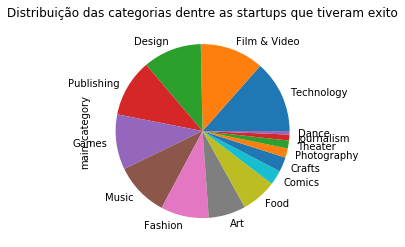

In [62]:
succes=data.loc[(data.Result=='succeded')]
succes['main_category'].value_counts().plot.pie();
plt.title('Distribuição das categorias dentre as startups que tiveram exito');

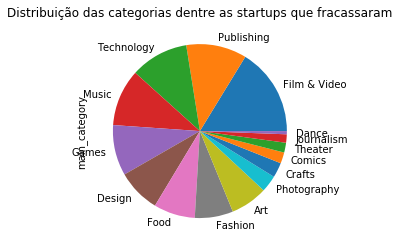

In [63]:
failed=data.loc[(data.Result=='failed')]
failed['main_category'].value_counts().plot.pie();
plt.title('Distribuição das categorias dentre as startups que fracassaram');

In [64]:
data['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64